In [ ]:
#폰트 다운
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [ ]:
#한글 폰트 지정
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] ='NanumBarunGothic'
matplotlib.rcParams['axes.unicode_minus'] =False
plt.rc('font', size=15)        # 기본 폰트 크기
plt.rc('font', family = 'NanumBarunGothic')

In [ ]:
#Y 데이터를 Q1이하, Q1~Q3, Q3이상 으로 구간화 하여 3개의 침수심 유형(침수 깊이 낮, 중, 높)으로 범주화
#최종데이터에서 Q2보다 낮은 값들은 0, Q2~Q3인 값들은 1, Q3 이상인 값들은 2로 전처리 후 -->knn, 의사결정트리 모델 머신러닝 후 정확도 평가
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
#로컬에서 파일 불러오기
from google.colab import files
uploaded = files.upload()

Saving 전처리완료데이터_최종_최종.csv to 전처리완료데이터_최종_최종 (1).csv


In [ ]:
import io

data = pd.read_csv(io.BytesIO(uploaded['전처리완료데이터_최종_최종.csv']), encoding="cp949")
data.head()

,침수심,강수량,하수도보급률,하수도설치율/면적,하수처리구역내면적,배수량
0,0.433,0.001,100.0,1.762030,22.088,1677.500000
1,0.550,0.001,100.0,1.257043,20.586,433.428571
2,0.400,0.001,100.0,1.257043,20.586,433.428571
3,0.450,0.001,100.0,1.257043,20.586,433.428571
4,0.530,0.001,100.0,1.257043,20.586,433.428571


In [ ]:
# target 데이터를 범주화 하기 위한 4분위 값 알아보기
data_Y = data['침수심']

Q1 = data_Y.quantile(q=0.25)
Q3 = data_Y.quantile(q=0.75)
Q2 = data_Y.quantile(q=0.5)


print("Q1 =",Q1)
print("Q3 =",Q3)
print("Q2 =",Q2)

Q1 = 0.4
Q3 = 0.9
Q2 = 0.6


In [ ]:
#Q1 = 0.4 Q3 = 0.9 Q2 = 0.6
#target 데이터 구간화 완.

data.loc[data['침수심'] < Q1, '침수심'] = 0
data.loc[data['침수심'] > Q3, '침수심'] = 2
data.loc[(data['침수심'] >= Q1) & (data['침수심'] <=Q3), '침수심'] = 1

In [ ]:
data

,침수심,강수량,하수도보급률,하수도설치율/면적,하수처리구역내면적,배수량
0,1.0,0.001,100.00,1.762030,22.088,1677.500000
1,1.0,0.001,100.00,1.257043,20.586,433.428571
2,1.0,0.001,100.00,1.257043,20.586,433.428571
3,1.0,0.001,100.00,1.257043,20.586,433.428571
4,1.0,0.001,100.00,1.257043,20.586,433.428571
...,...,...,...,...,...,...
202,1.0,0.001,100.00,6.484296,7.737,220.000000
203,1.0,0.001,100.00,1.038603,10.616,590.000000
204,2.0,0.001,100.00,2.417009,20.553,146.600000
205,1.0,0.001,85.19,0.290925,54.865,1133.000000


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# feature, target 데이터 분리
y_target = data['침수심'] # 레이블(종속변수)
X_data = data.drop(['침수심'], axis=1, inplace=False) # 피처(독립변수)

# train, test 데이터 분리
X_train , X_test , y_train , y_test = train_test_split(X_data , y_target , test_size=0.3, random_state=156)

In [ ]:
# 표준 정규분포로 정규화 해주는 라이브러리 불러오기
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# x_train 데이터 정규화
scaler.fit(X_train)

# x_train, x_test 데이터 정규화 및 변환
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors = 4)  # k가 4일 때 정확도가 가장 좋다. k가 많아질수록 과소적합

In [ ]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
# 모델 평가
print('KNN 예측정확도: {0:.4f}'.format(knn_classifier.score(X_test, y_test)))

KNN 예측정확도: 0.6508




# *   변수 중요도(Varialbe Importance)란?

학습된 모형에 대하여 반응 변수와의 관련성 또는 예측 관점에서 각 변수들의 영향력을 수치화 한 것이다.

이는 모형의 예측력과 관련하여 개별 변수의 영향력을 측정하는 도구이다.

예측 모형 클래스에 관계 없이 적용가능한 Permutation Importance 방법으로 변수 중요도를 측정하여 시각화 해본다.



In [ ]:
# 생성된 모델의 변수중요도 계산
from sklearn.inspection import permutation_importance

features = ['강수량','하수도보급률', '하수도설치율/면적','하수처리구역내면적','배수량']

r = permutation_importance(knn_classifier, X_train, y_train,
                           n_repeats=30,
                           random_state=0)
for i, res in enumerate(zip(r.importances_mean, r.importances_std)):
    print(f'{features[i]}'+':', f'{res[0]:.3f}', '+/-', f'{res[1]:.3f}')

강수량: 0.130 +/- 0.024
하수도보급률: 0.011 +/- 0.013
하수도설치율/면적: 0.021 +/- 0.017
하수처리구역내면적: 0.014 +/- 0.010
배수량: 0.037 +/- 0.025


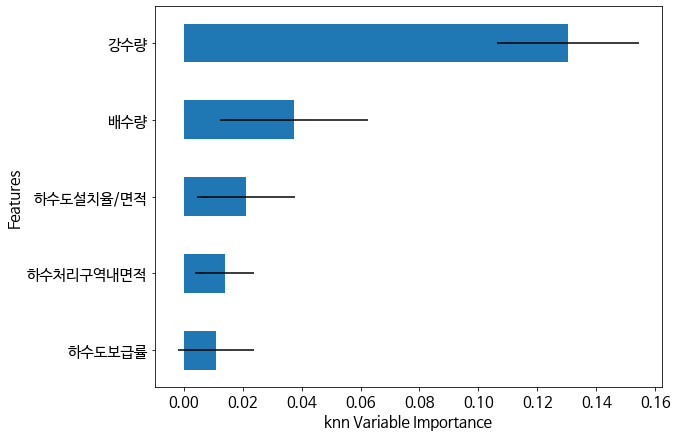

In [ ]:
# 생성된 모델의 변수 중요도 시각화 한 그래프 출력하기

def plot_importance(importance, importance_std, ax, x_label):
    temp1 = [f'{features[i]}' for i in range(len(importance))]
    temp2 = importance
    temp3 = importance_std
    result = sorted(zip(temp1, temp2, temp3), key=lambda x:x[1])
    label = [x[0] for x in result]
    value = [x[1] for x in result]
    value_2 = [x[2] for x in result]
    ax.barh(label, value, xerr=value_2, height=0.5)
    ax.set_xlabel(x_label)
    ax.set_ylabel('Features')

fig, axs = plt.subplots(1, 1)
fig.set_facecolor('white')
fig.set_figwidth(20)
fig.set_figheight(7)

ax1 = plt.subplot(1, 2, 1)

plot_importance(r.importances_mean, r.importances_std, ax1, 'knn Variable Importance')

plt.show()

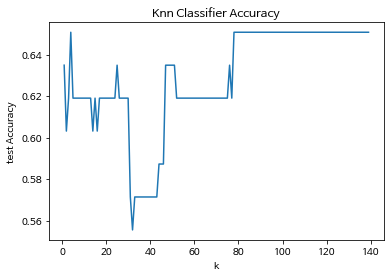

In [ ]:
# k값을 1~100까지 바꿔가며 모델 정확도를 구하고 시각화 하기
k_list = range(1,140)
accuracies = []
for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(X_train, y_train)
  accuracies.append(classifier.score(X_test, y_test))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("test Accuracy")
plt.title("Knn Classifier Accuracy")
plt.show()

# **N-FOLD(N = 10) 교차 검증**

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

score = cross_val_score(knn_classifier, X_data, y_target, scoring='accuracy', cv=10)


print('교차 검증별 정확도:', np.round(score, 4))
print('평균 검증 정확도:', np.round(np.mean(score), 4))

교차 검증별 정확도: [0.6667 0.6667 0.0952 0.4286 0.6667 0.381  0.7619 0.65   0.3    0.5   ]
평균 검증 정확도: 0.5117


In [ ]:
from sklearn.model_selection import RepeatedKFold
rkfold = RepeatedKFold(n_splits=5, n_repeats=100, random_state=42)
scores = cross_val_score(knn_classifier, X_data, y_target,scoring='accuracy', cv=rkfold)
scores.mean() #평균 검증 정확도

0.6344308943089431